![Astrofisica Computacional](../../logo.png)

---
## `FITS` Image files


Eduard Larrañaga (ealarranaga@unal.edu.co)

---


### About this notebook

In this worksheet we use the `astropy` package to read a .fits file and visualize an astronomical image.

---

## FITS Files

The [Flexible Image Transport System](https://fits.gsfc.nasa.gov/fits_documentation.html) format (FITS) is widely used data format for astronomical images, spectra and tables.
The FITS was invented by the astronomical community and it is still in use because it is simple, efficient and logical in its structure and **is NOT compressed**. This means that it had its original resolution and required no fancy software to decompress it. 

---

We will use a .fits image of galaxy M31 obtained from the SIMBAD Database. Go to

http://cdsportal.u-strasbg.fr/?target=andromeda

In the Tabular Data section, click on the VizieR images tab and download the images

m31_sdss_obs_flux_attcorr_nomask_g.fit \
m31_sdss_obs_flux_attcorr_nomask_r.fit \
m31_sdss_obs_flux_attcorr_nomask_u.fit 

which correspond to three photometric images with the filters g, r and u.

For a detalied description of working with .fits files using `astropy`, go to

http://docs.astropy.org/en/stable/io/fits/index.html

---

## 1. Open and Close a .fits file

The first task is to read one of these files using the function `fits.open()` from the `astropy.io` package. The `open` function returns an object called HDUList  and therefor it is assigned to the variable `hdul`. This is a list-like collecion of HDU (Header Data Unit) objects.

In [ ]:
from matplotlib import pyplot as plt
from astropy.io import fits
import numpy as np

In [ ]:
hdul = fits.open('data/m31_sdss_obs_flux_attcorr_nomask_r.fit')

The method `.info()` returns a summary of the content of the FITS file.

In [ ]:
hdul.info()

Filename: /content/drive/MyDrive/Colab Notebooks/CA2021/02. Astrophysics Data/presentation/05.FITSImage01/m31_sdss_obs_flux_attcorr_nomask_r.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      59   (2300, 7400)   float32   


There can be many extensions dentoed by `hdul[0]`, `hdul[1]`, etc. The first one, `hdul[0]`, is called the PRIMARY extension. There is also another type of information as the number of cards and the dimensions of the data table.  

Since we open the file to extract and assign the information, it is recommendable to close the file:

In [ ]:
hdul.close()

Using the context manager, we have a better way to open the file and close it immediately. 

In [1]:
with fits.open('data/m31_sdss_obs_flux_attcorr_nomask_r.fit') as hdul:
    hdul.info() 

NameError: name 'fits' is not defined

### 1.1. Headers and Data

Each HDU object has a `.header` and a `.data` attributes. Using the method `header` of `astropy` it is possible to see the header of each HDU object. For example:

In [ ]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2300                                                  
NAXIS2  =                 7400                                                  
COMMENT Keywords relevant for current image:                                    
CREATOR = 'Taavi Tuvikene & Elmo Tempel' / Creators of the present image        
COMM2   = 'Image is intrinsic attenuation corrected.'                           
MODELDAT= '08.okt 2010'        / Model creation date                            
DATE_MOD= '2011-02-25 18:58'   / file modification date                         
BUNIT   = 'nanomaggies/px'     / They are 10^9 times the flux: m=22.5-2.5log(f) 
PIX_SIZE=                 3.96 / pixel scale (arcsec)                           
MASKED  = 'false   '        

There is a lot of information as, for example, ORIGIN, DATE, RA, DEC, TELESCOPE, FILTER, etc. To access one of these items we use

In [ ]:
hdul[0].header['DEC']

38.585177

Information about filters in astronomy can be found at

https://en.wikipedia.org/wiki/Photometric_system

On the other hand, the method `data` from `astropy` gives access to the data of each HDU object. For example, we assign the data in the above FITS file to the variable image_data 

**Note: It is important to assign this information before closing the .fits file!**

In [ ]:
hdul = fits.open('data/m31_sdss_obs_flux_attcorr_nomask_r.fit')
image_data = hdul[0].data
hdul.close()

The information is stored in a numpy array:

In [ ]:
type(image_data)

numpy.ndarray

The shape of the array is easily obtained:

In [ ]:
image_data.shape

(7400, 2300)

The values in the array can be shown explicitly. For example,

In [ ]:
image_data[10:15 , 20:30]

array([[-4.92633611e-01, -8.03247690e-01, -5.22964895e-01,
        -2.91345656e-01, -2.70594358e-01, -4.49124455e-01,
        -2.91656554e-01, -4.97993410e-01, -2.29298756e-01,
        -2.89649874e-01],
       [-3.16511750e-01, -1.10383384e-01, -6.01739883e-01,
        -1.45349309e-01, -4.23521399e-01, -3.93501520e-01,
         1.23136975e-01,  4.26590741e-01, -2.13070124e-01,
        -4.28676814e-01],
       [ 1.28217801e-01, -3.67775321e-01, -8.66082966e-01,
        -3.37857783e-01, -2.47589812e-01, -2.50010431e-01,
         1.46271879e-04, -1.06549725e-01, -3.68501604e-01,
        -3.43115211e-01],
       [-1.54722705e-01,  2.36022305e-02,  1.41679868e-01,
        -7.78364122e-01, -2.13061154e-01, -1.13521606e-01,
        -6.49620518e-02, -4.65253964e-02, -5.98129094e-01,
        -3.59555781e-01],
       [-7.06491411e-01,  2.56591961e-02, -3.91547173e-01,
        -3.22131276e-01, -3.50039452e-01, -4.01119798e-01,
        -7.28825340e-03, -2.20576391e-01, -4.19961721e-01,
        -2.

We can also show some important values such as the minimum, the maximum, the mean value, etc.

In [ ]:
np.min(image_data)

-3.081798

In [ ]:
np.max(image_data)

12873.503

In [ ]:
np.mean(image_data)

6.458502

## 2. Visualizing the Image

We will use the `matplotlib.pyplot` function `imshow` to visualize the data in the fits file. For detailed information go to

http://learn.astropy.org/rst-tutorials/FITS-images.html?highlight=filtertutorials

https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html


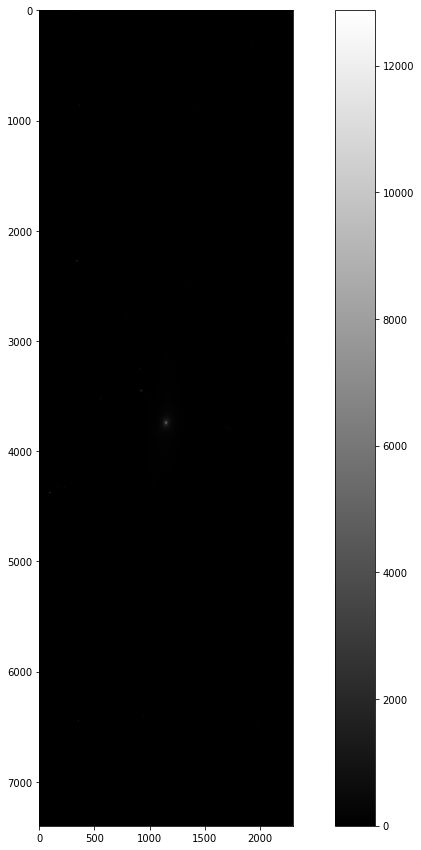

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(image_data, cmap='gray')
plt.colorbar()
plt.show()

Note that the image is almost all black pixels. We inserted a colorbar to see the values of the data points in the array. Due to the big range of values, we can change the 'gray' color map. For information about color maps go to

https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html

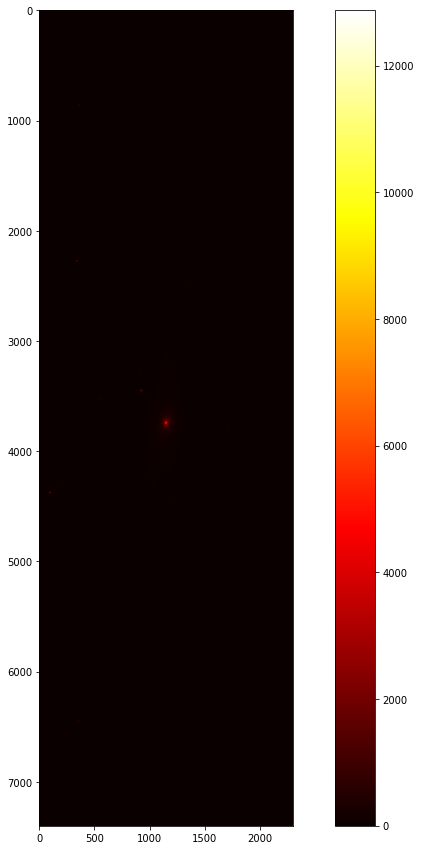

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(image_data, cmap='hot')
plt.colorbar()
plt.show()

Or we can use a logarithmic color scale by using the function `LogNorm` from `matplotlib.colors`. 

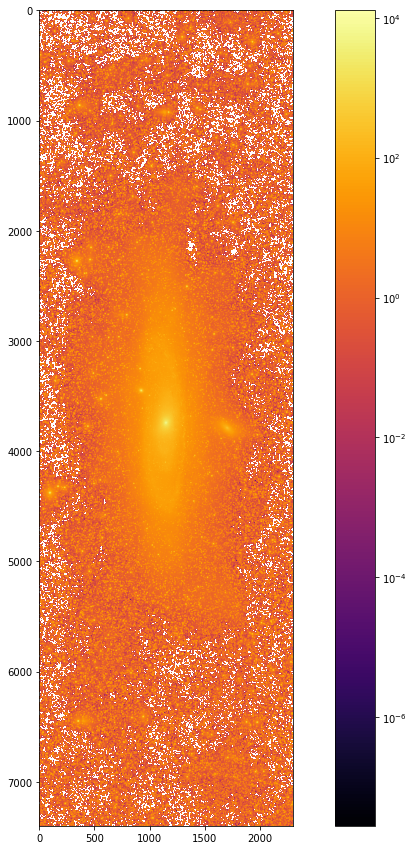

In [ ]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(15,15))
plt.imshow(image_data, cmap='inferno', norm=LogNorm())
plt.colorbar()
plt.show()

### 2.1. Histogram Plot

The data in the 2D array can be flattened,

In [ ]:
flat_data = image_data.flatten()

The shape of this information is

In [ ]:
flat_data.shape

(17020000,)

The minimum and maximum values in this dataset are

In [ ]:
np.min(flat_data)

-3.081798

In [ ]:
np.max(flat_data)

12873.503

To make a histogram with this data is easy. Here we choose an arbitrary number of bins and use a log scale to show the information. More information in

https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html

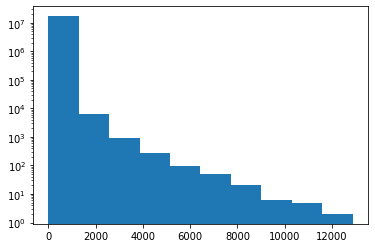

In [ ]:
plt.hist(flat_data, bins=10,log=True) 
plt.show()

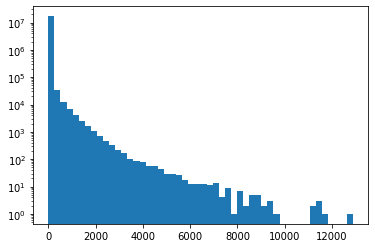

In [ ]:
plt.hist(flat_data, bins=50,log=True) 
plt.show()

This histogram let us consider to plot the image using only data points in some range of values to improve the visualization. For example between 1 and 1E3

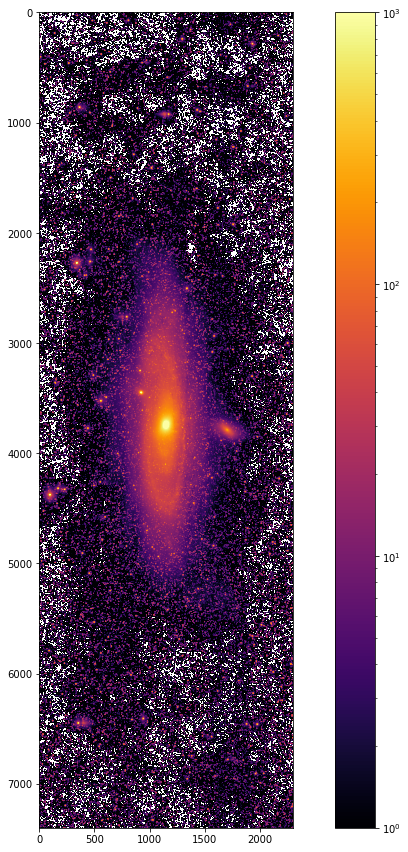

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(image_data, cmap='inferno', vmin=1, vmax=1E3, norm=LogNorm())
plt.colorbar()
plt.show()